<a href="https://colab.research.google.com/github/jamescavanagh/unpackAI/blob/main/EEG_Alchoholism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 24.0 MB/s 
     |████████████████████████████████| 60 kB 5.5 MB/s 
     |████████████████████████████████| 46 kB 2.1 MB/s 
     |████████████████████████████████| 1.2 MB 34.4 MB/s 
     |████████████████████████████████| 188 kB 19.5 MB/s 
     |████████████████████████████████| 54 kB 1.3 MB/s 
     |████████████████████████████████| 51 kB 207 kB/s 
Mounted at /content/gdrive


# Imports

In [36]:
from fastbook import *

import numpy as np
import pandas as pd 
import os
import random

from tqdm import tqdm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
from kaggle import api

In [9]:
gdrivePath = '/content/drive/MyDrive/Colab_Data/EEG'
%cd '/content/drive/MyDrive/Colab_Data/EEG'
!kaggle datasets download nnair25/Alcoholics
#if not path.exists():
#path.mkdir(parents=true)
#api.competition_download_cli('favorita-grocery-sales-forecasting', path=gdrivePath)
#file_extract(os.path.join(gdrivePath,'favorita-grocery-sales-forecasting.zip'))

#path.ls(file_type='text')

/content/drive/MyDrive/Colab_Data/EEG
 96% 277M/287M [00:02<00:00, 111MB/s]
100% 287M/287M [00:02<00:00, 110MB/s]


In [13]:
file_extract(os.path.join(gdrivePath,'Alchoholics.zip'))

NameError: ignored

In [15]:
eegPath =  os.path.join(gdrivePath,'Alchoholics.zip')

In [17]:
!unzip Alcoholics.zip

Archive:  Alcoholics.zip
  inflating: SMNI_CMI_TEST/Data1.csv  
  inflating: SMNI_CMI_TEST/Data10.csv  
  inflating: SMNI_CMI_TEST/Data100.csv  
  inflating: SMNI_CMI_TEST/Data101.csv  
  inflating: SMNI_CMI_TEST/Data102.csv  
  inflating: SMNI_CMI_TEST/Data103.csv  
  inflating: SMNI_CMI_TEST/Data104.csv  
  inflating: SMNI_CMI_TEST/Data105.csv  
  inflating: SMNI_CMI_TEST/Data106.csv  
  inflating: SMNI_CMI_TEST/Data107.csv  
  inflating: SMNI_CMI_TEST/Data108.csv  
  inflating: SMNI_CMI_TEST/Data109.csv  
  inflating: SMNI_CMI_TEST/Data11.csv  
  inflating: SMNI_CMI_TEST/Data110.csv  
  inflating: SMNI_CMI_TEST/Data111.csv  
  inflating: SMNI_CMI_TEST/Data112.csv  
  inflating: SMNI_CMI_TEST/Data113.csv  
  inflating: SMNI_CMI_TEST/Data114.csv  
  inflating: SMNI_CMI_TEST/Data115.csv  
  inflating: SMNI_CMI_TEST/Data116.csv  
  inflating: SMNI_CMI_TEST/Data117.csv  
  inflating: SMNI_CMI_TEST/Data118.csv  
  inflating: SMNI_CMI_TEST/Data119.csv  
  inflating: SMNI_CMI_TEST/Data12.cs

In [26]:
filenames_list = os.listdir('SMNI_CMI_TRAIN/') ## list of file names in the directory

## create an empty df that will hold data from each file
EEG_data = pd.DataFrame({})

for file_name in tqdm(filenames_list):
    temp_df = pd.read_csv('/content/drive/MyDrive/Colab_Data/EEG/SMNI_CMI_TEST/' + file_name) ## read from the file to df
    EEG_data = EEG_data.append(temp_df) ## add the file data to the main df


100%|█████████▉| 468/469 [05:56<00:01,  1.45s/it]

FileNotFoundError: ignored

In [28]:

EEG_data = EEG_data.drop(['Unnamed: 0'], axis=1)

In [29]:
# Removes comma sign from stimulus naim
EEG_data.loc[EEG_data['matching condition'] == 'S2 nomatch,', 'matching condition'] =  'S2 nomatch' 


In [30]:
EEG_data.head()

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,30,FP1,0,-3.550,a,S1 obj,0,co2a0000364,0.000000
1,30,FP1,1,-5.015,a,S1 obj,0,co2a0000364,0.003906
2,30,FP1,2,-5.503,a,S1 obj,0,co2a0000364,0.007812
3,30,FP1,3,-3.550,a,S1 obj,0,co2a0000364,0.011719
4,30,FP1,4,-0.621,a,S1 obj,0,co2a0000364,0.015625


In [47]:
F=pd.read_csv("SMNI_CMI_TRAIN/Data1.csv",index_col=0)

In [55]:
EEG_data['sensor position'].unique()

array(['FP1', 'FP2', 'F7', 'F8', 'AF1', 'AF2', 'FZ', 'F4', 'F3', 'FC6', 'FC5', 'FC2', 'FC1', 'T8', 'T7', 'CZ', 'C3', 'C4', 'CP5', 'CP6', 'CP1', 'CP2', 'P3', 'P4', 'PZ', 'P8', 'P7', 'PO2', 'PO1',
       'O2', 'O1', 'X', 'AF7', 'AF8', 'F5', 'F6', 'FT7', 'FT8', 'FPZ', 'FC4', 'FC3', 'C6', 'C5', 'F2', 'F1', 'TP8', 'TP7', 'AFZ', 'CP3', 'CP4', 'P5', 'P6', 'C1', 'C2', 'PO7', 'PO8', 'FCZ', 'POZ',
       'OZ', 'P2', 'P1', 'CPZ', 'nd', 'Y'], dtype=object)

In [57]:
EEG_data['sensor value'].unique()

array([ -3.55 ,  -5.015,  -5.503, ..., -64.982, -62.541, -59.123])

In [50]:
print(F.head(5))
print(F.dtypes)

   trial number sensor position  sample num  sensor value subject identifier  \
5             0             FP1           0        -8.921                  a   
6             0             FP1           1        -8.433                  a   
7             0             FP1           2        -2.574                  a   
8             0             FP1           3         5.239                  a   
9             0             FP1           4        11.587                  a   

  matching condition  channel         name      time  
5             S1 obj        0  co2a0000364  0.000000  
6             S1 obj        0  co2a0000364  0.003906  
7             S1 obj        0  co2a0000364  0.007812  
8             S1 obj        0  co2a0000364  0.011719  
9             S1 obj        0  co2a0000364  0.015625  
trial number            int64
sensor position        object
sample num              int64
sensor value          float64
subject identifier     object
matching condition     object
channel  

In [52]:
F['subject identifier'] = F['subject identifier'].astype('string')
F['matching condition']= F['matching condition'].astype('string')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


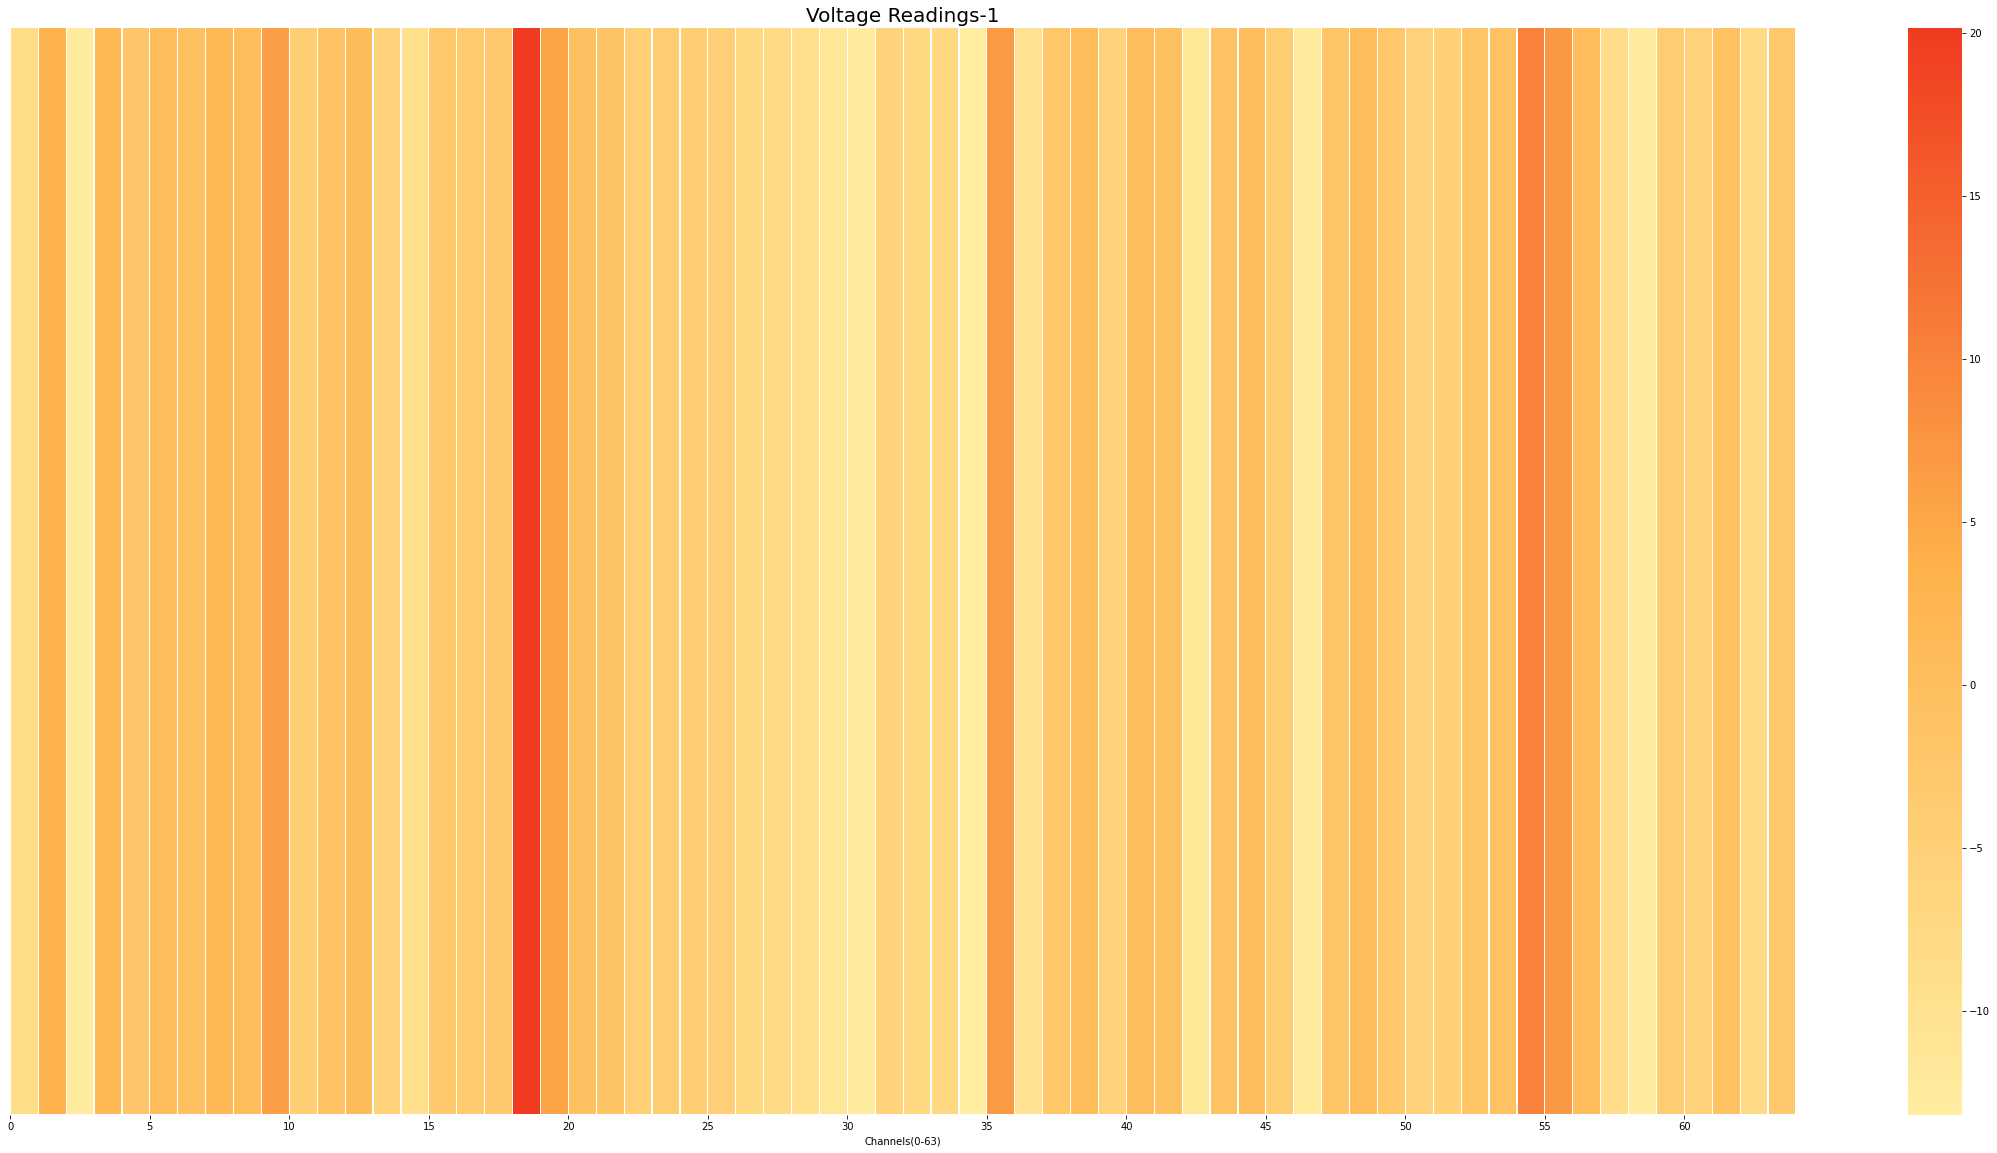

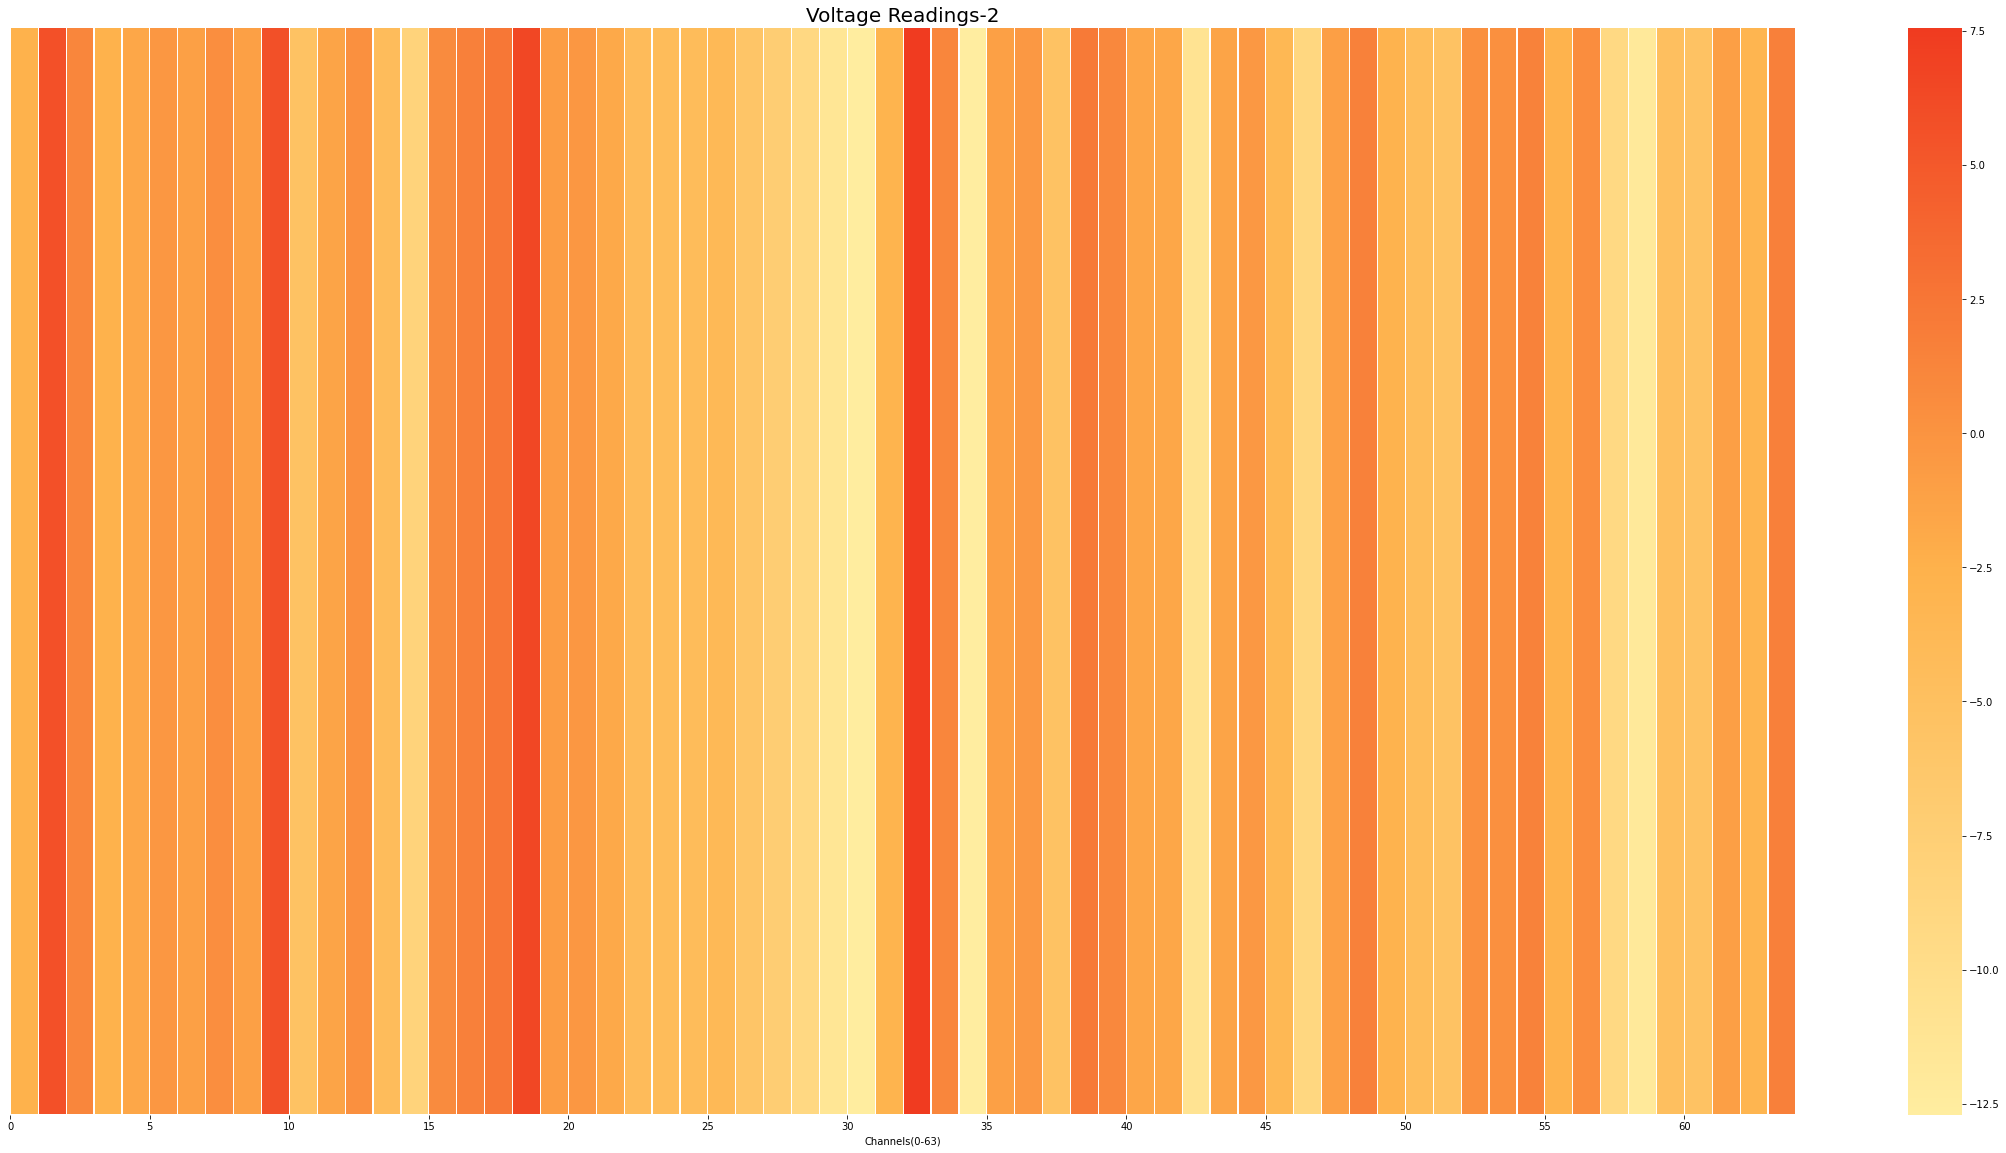

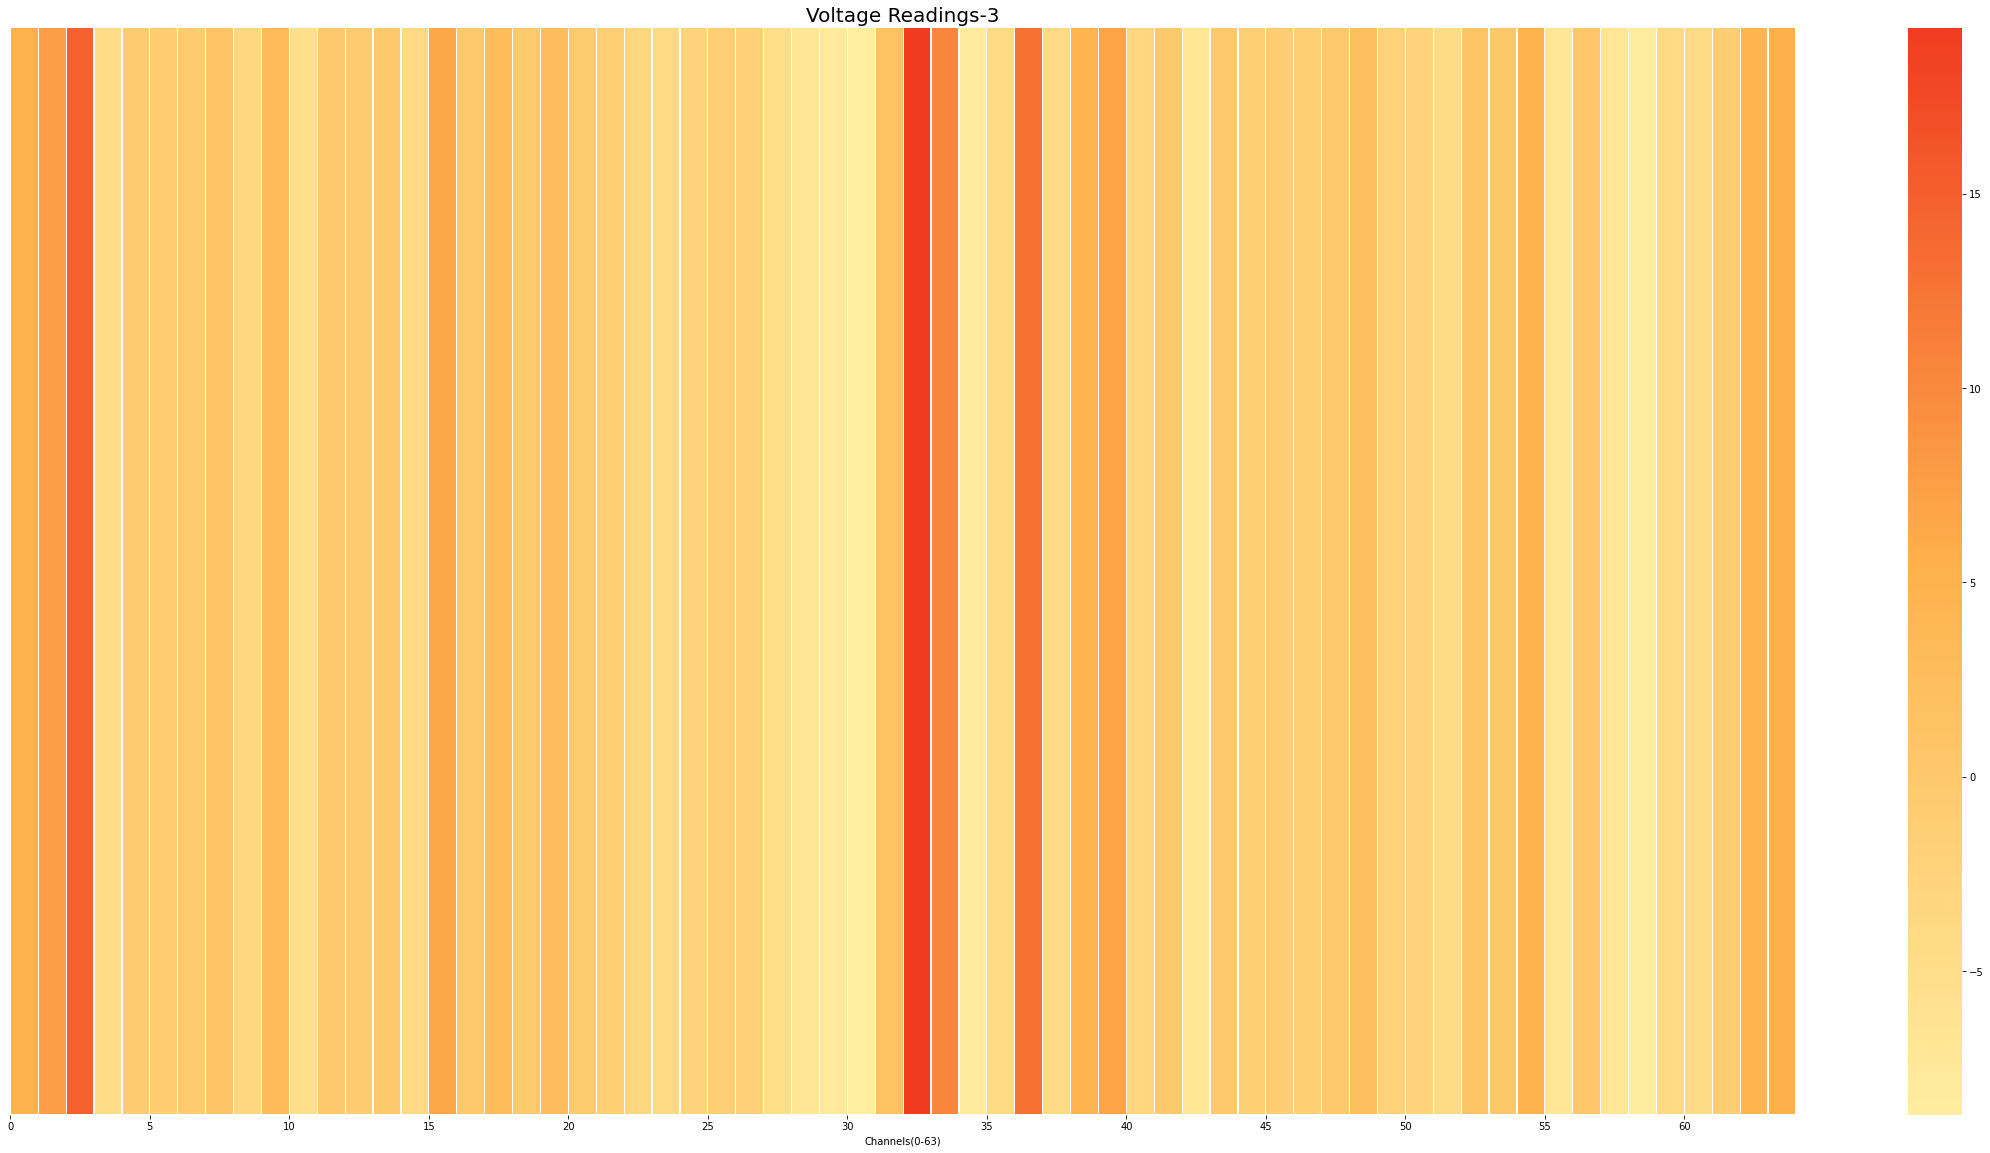

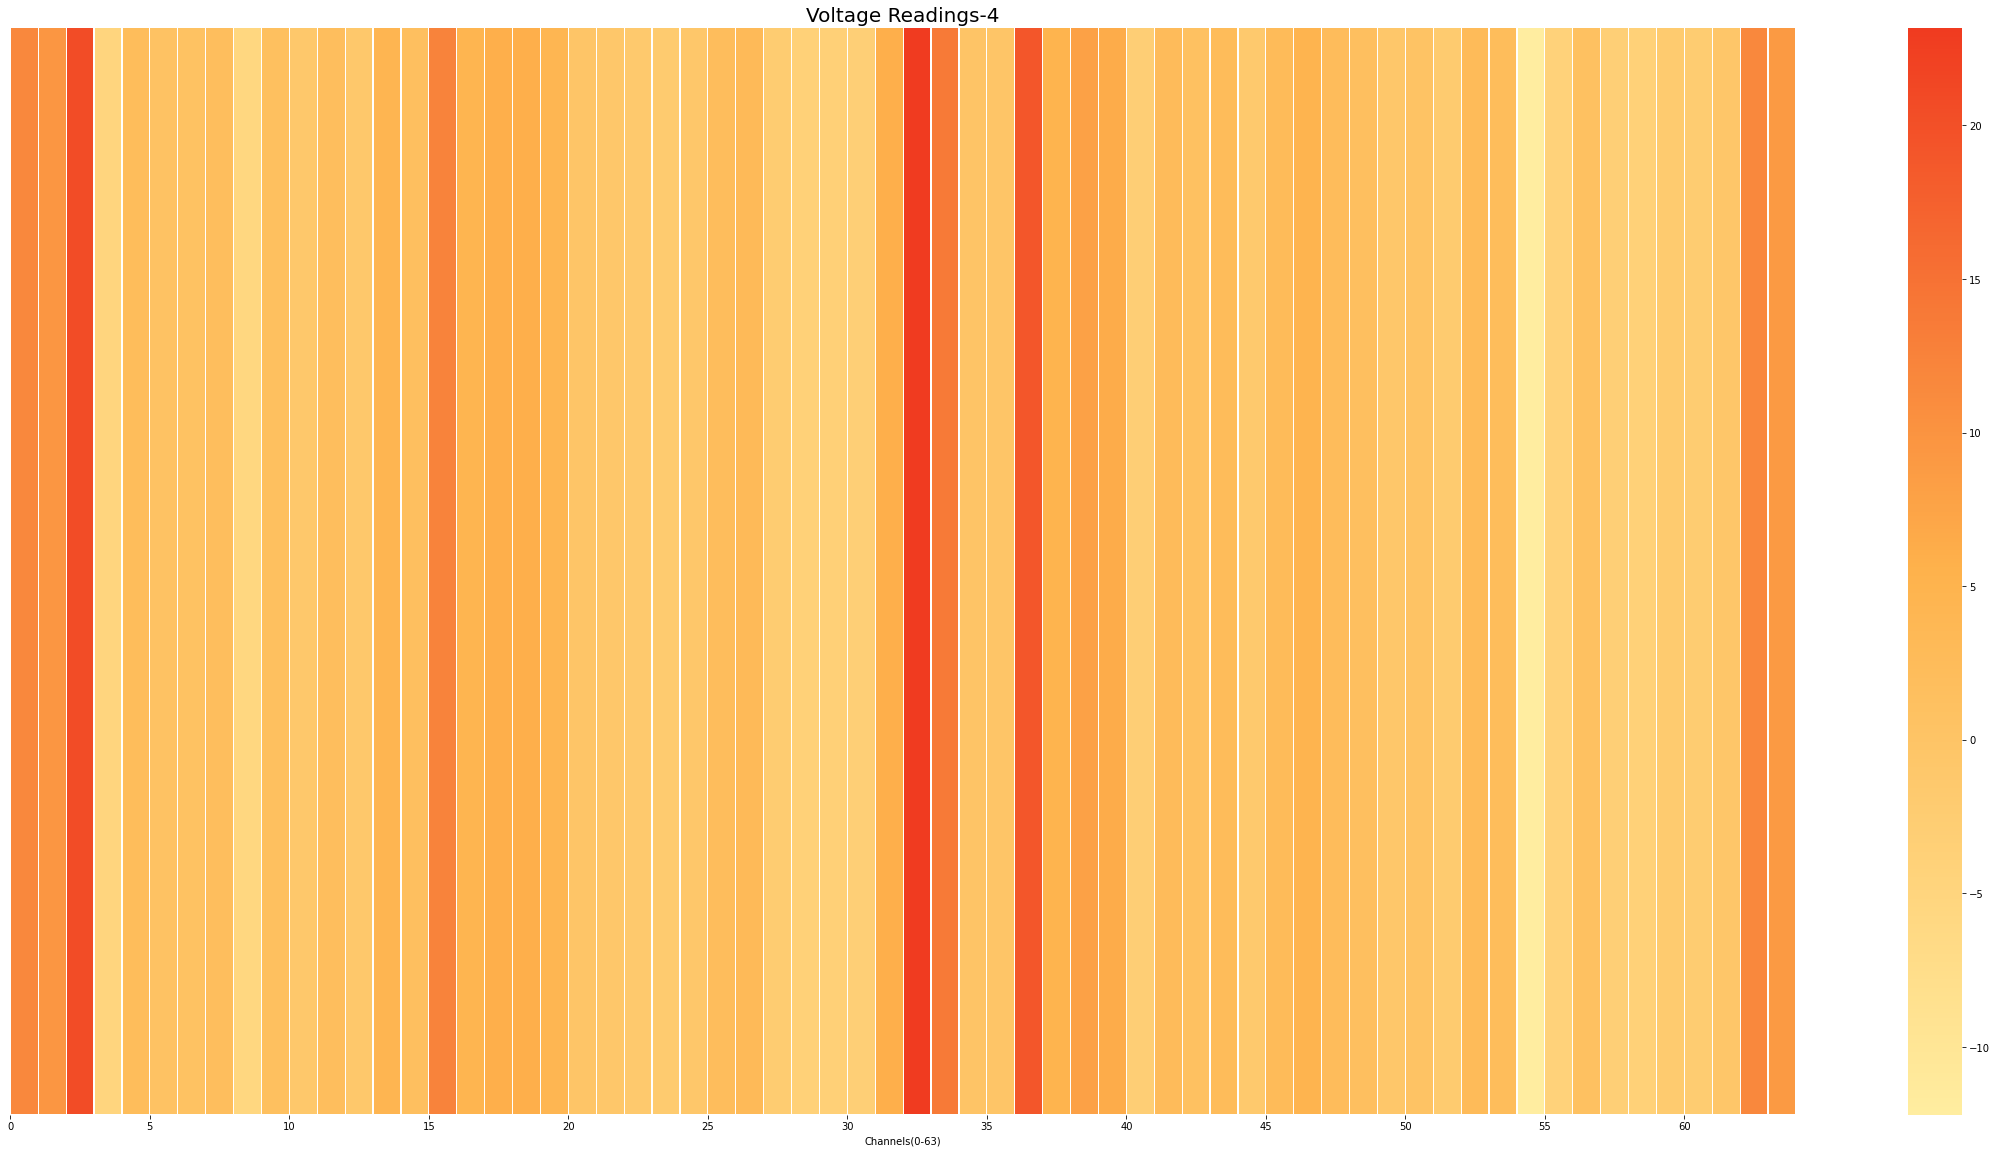

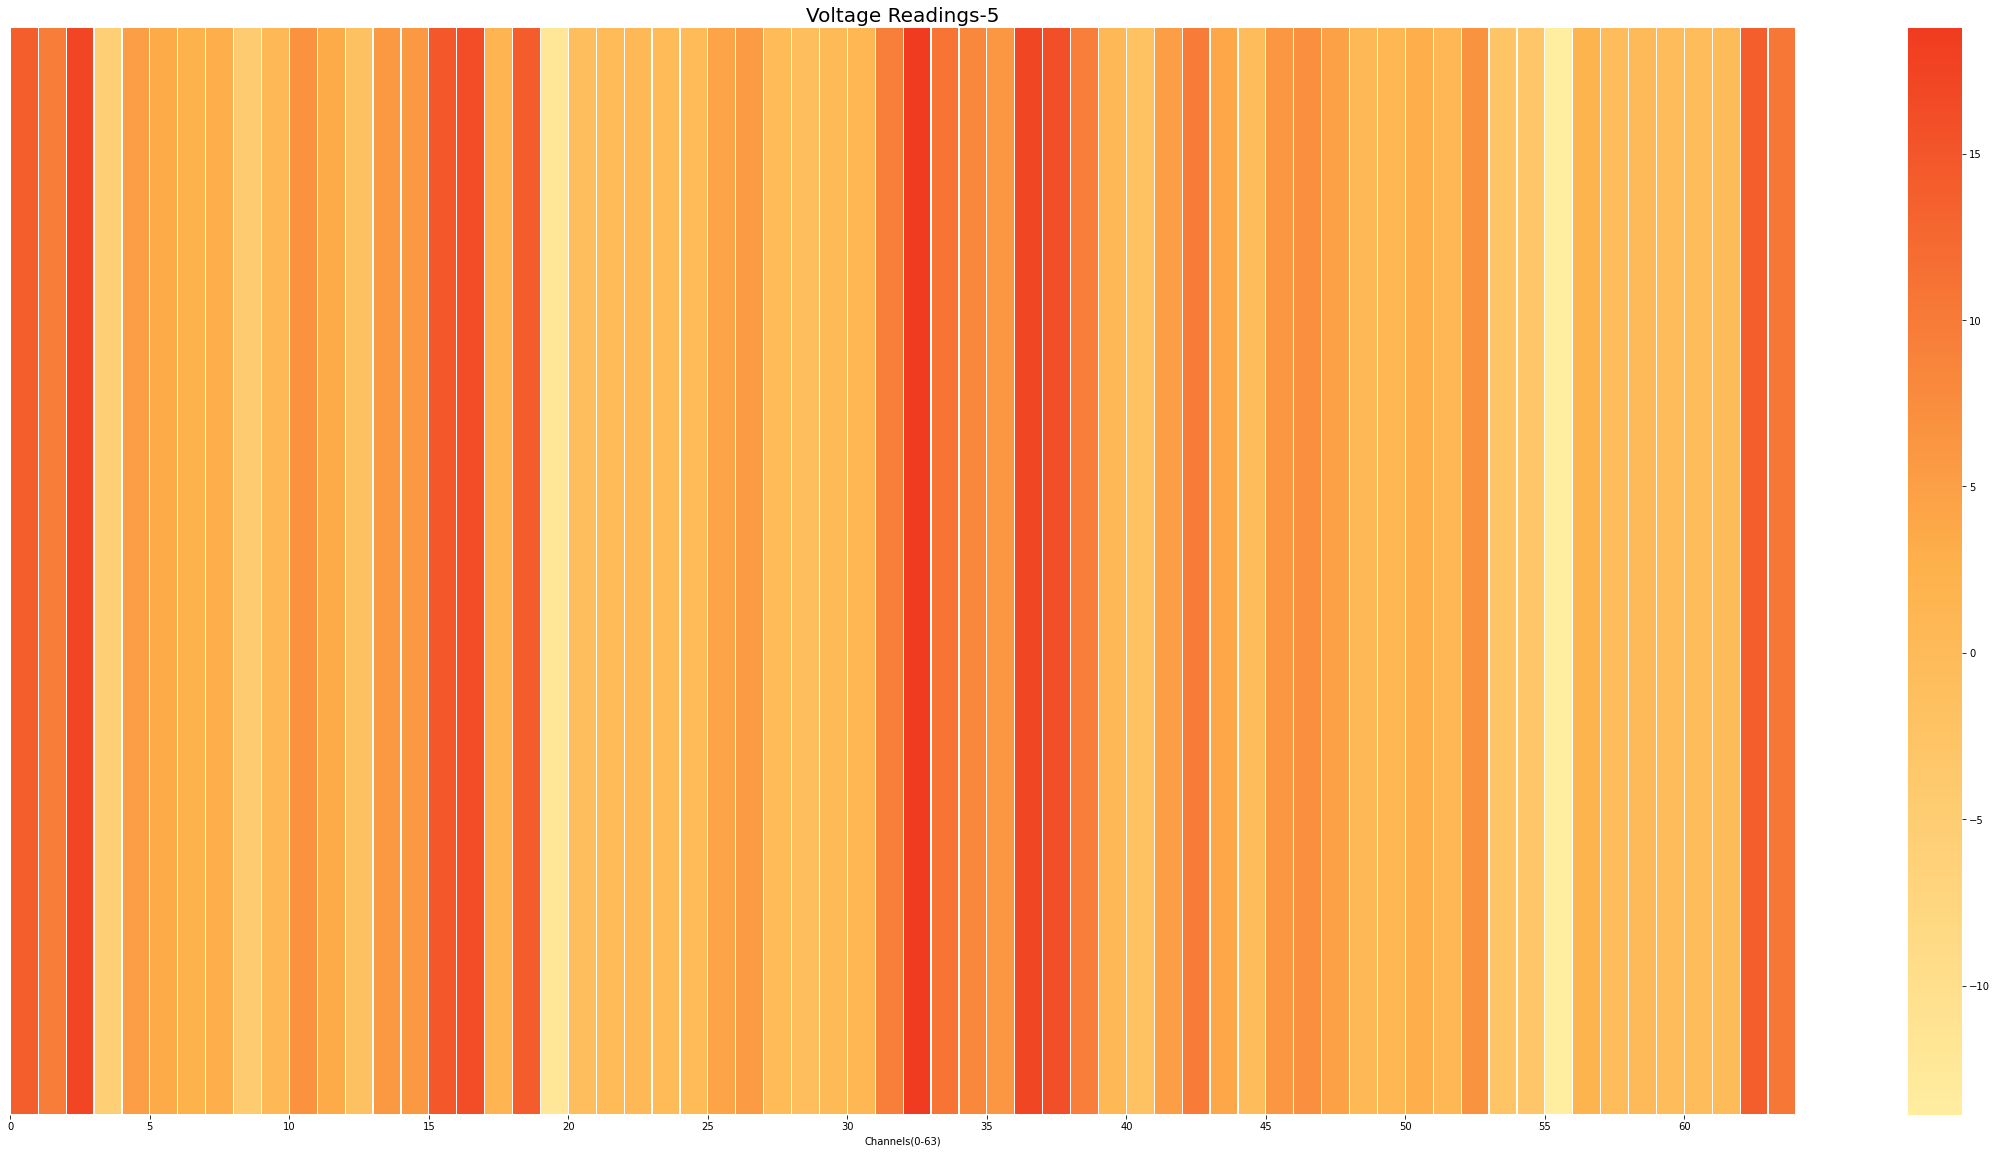

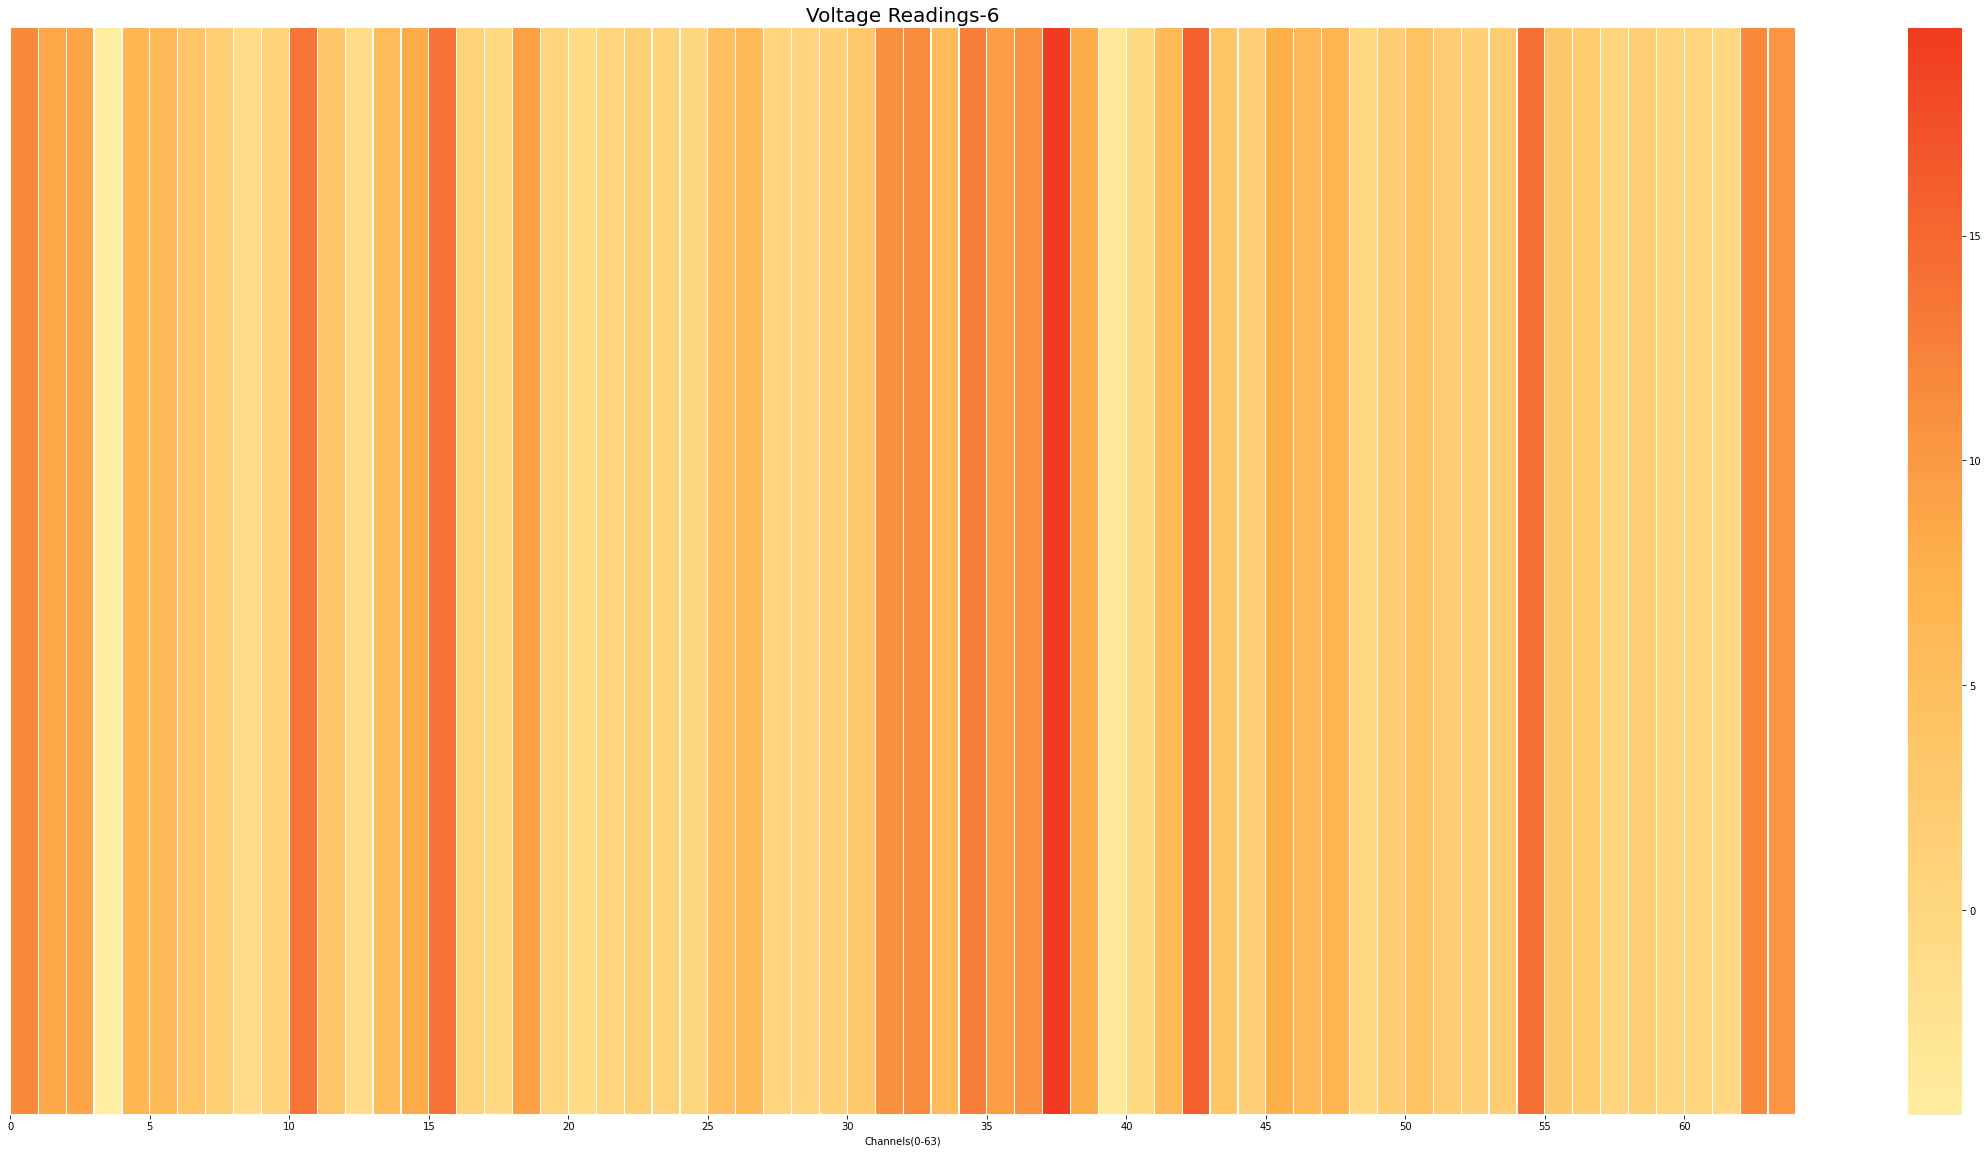

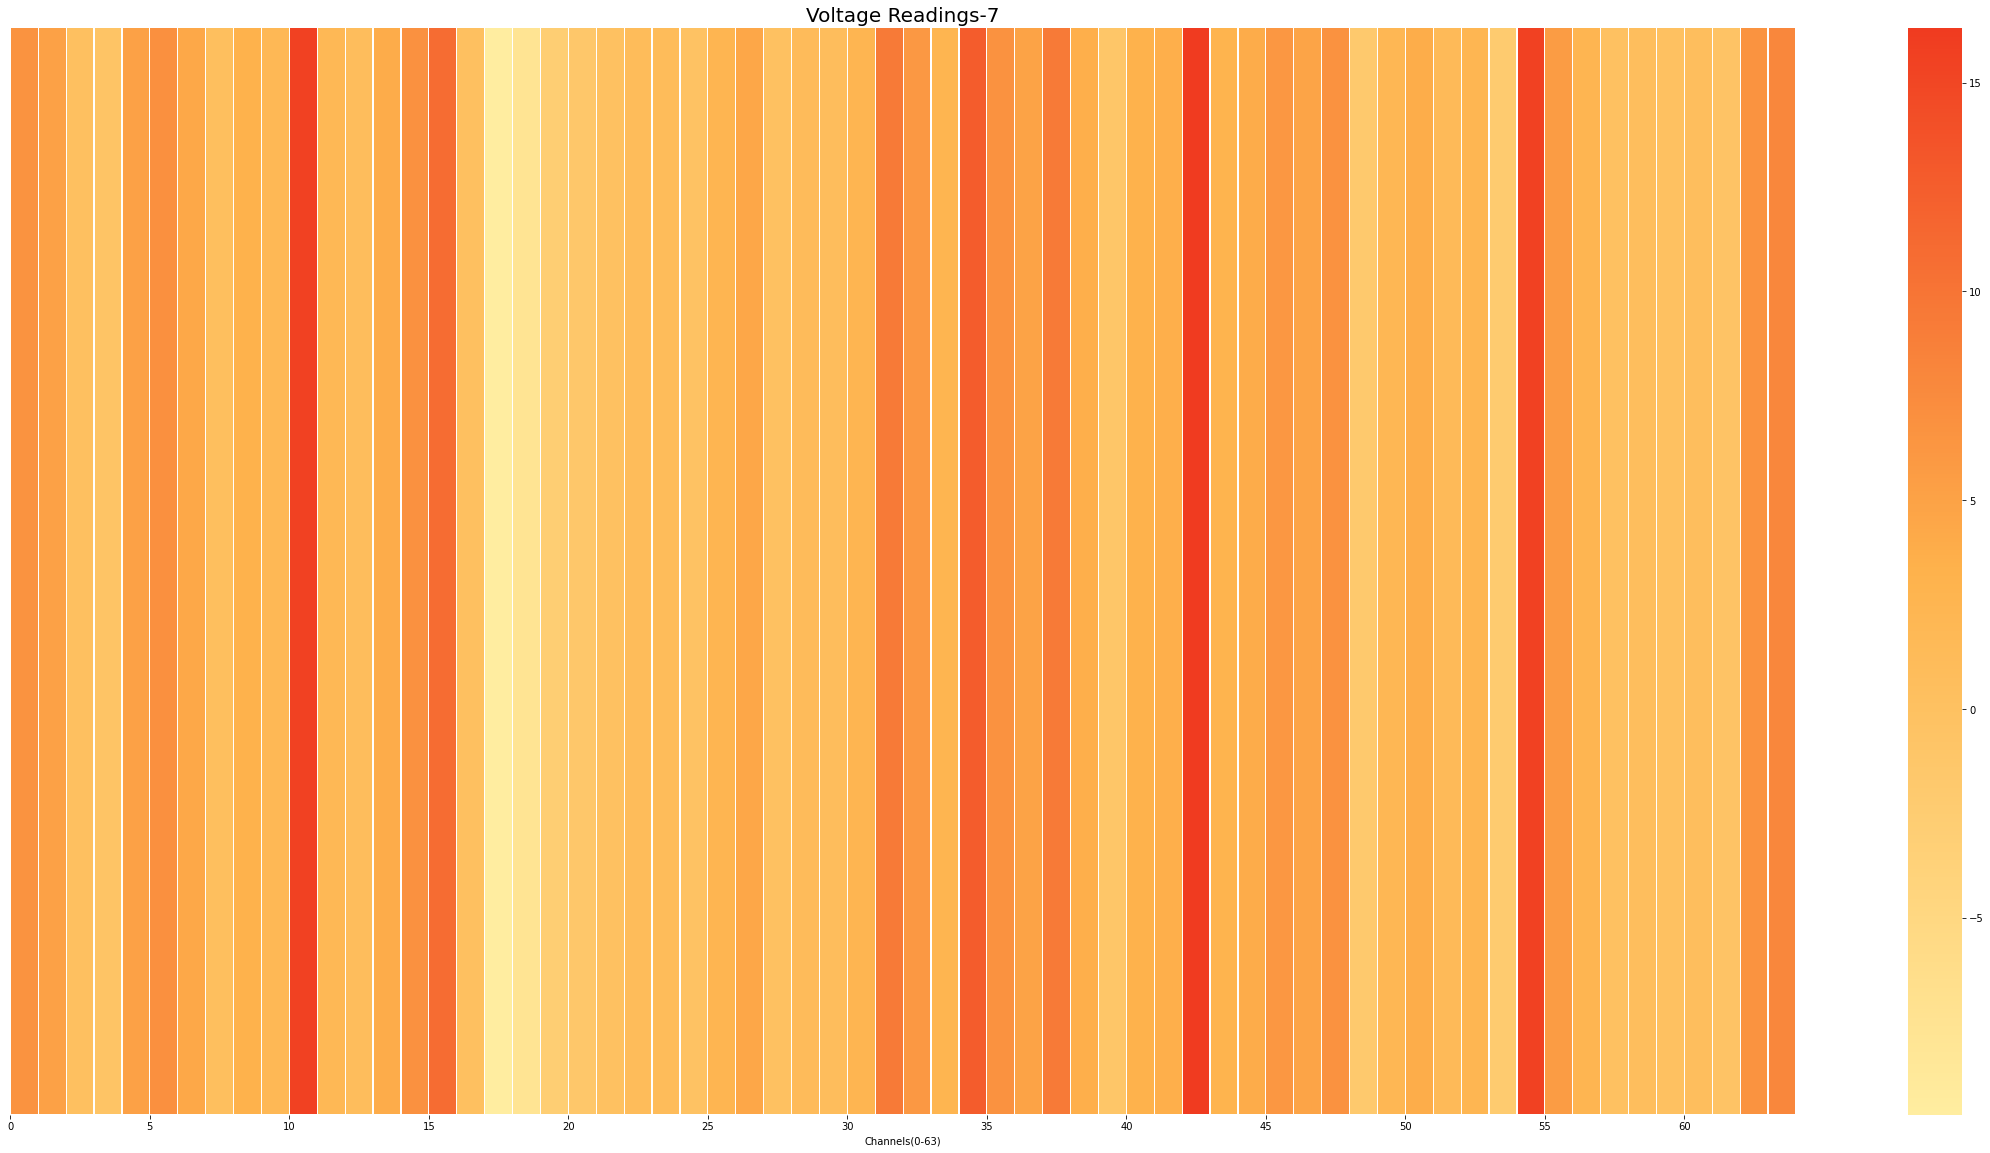

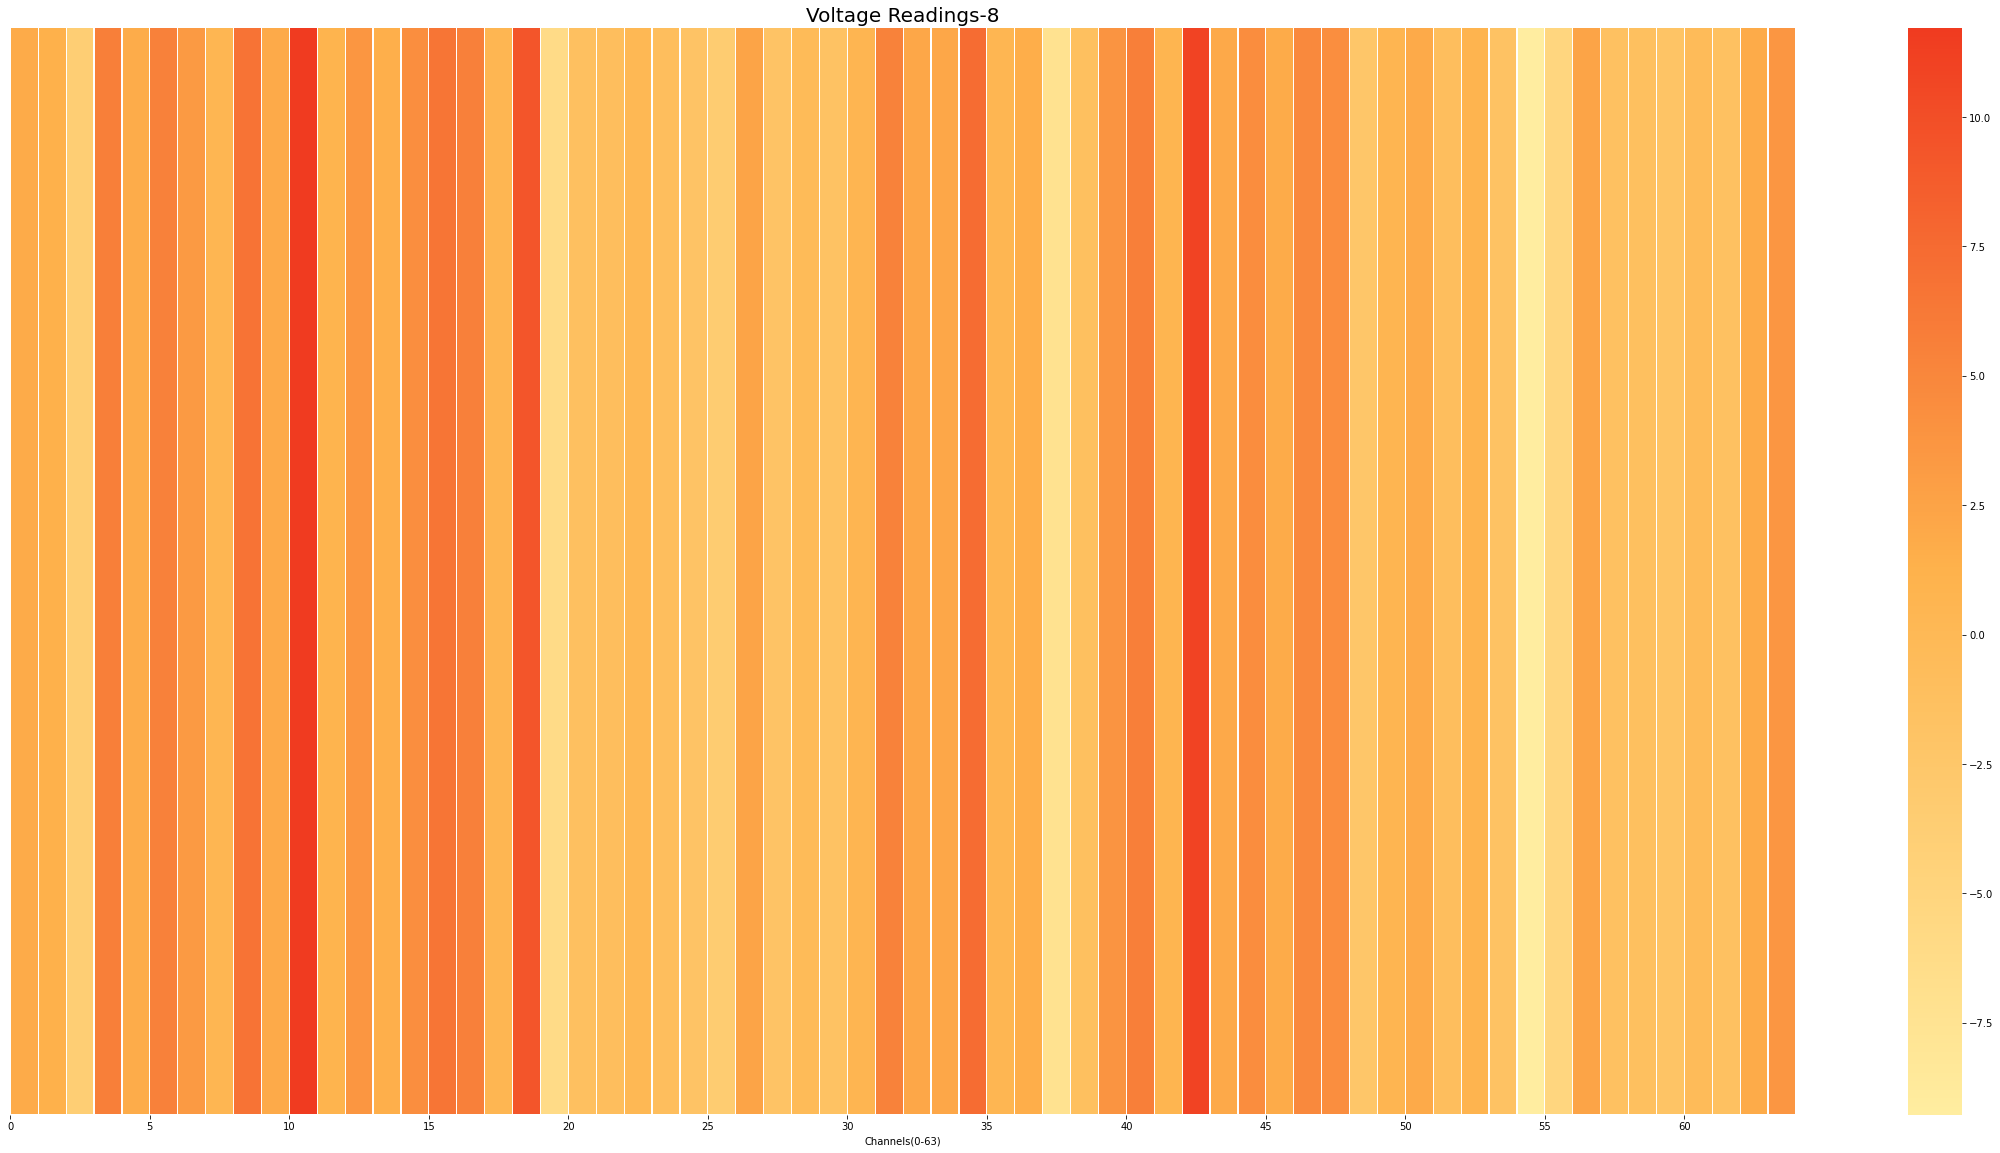

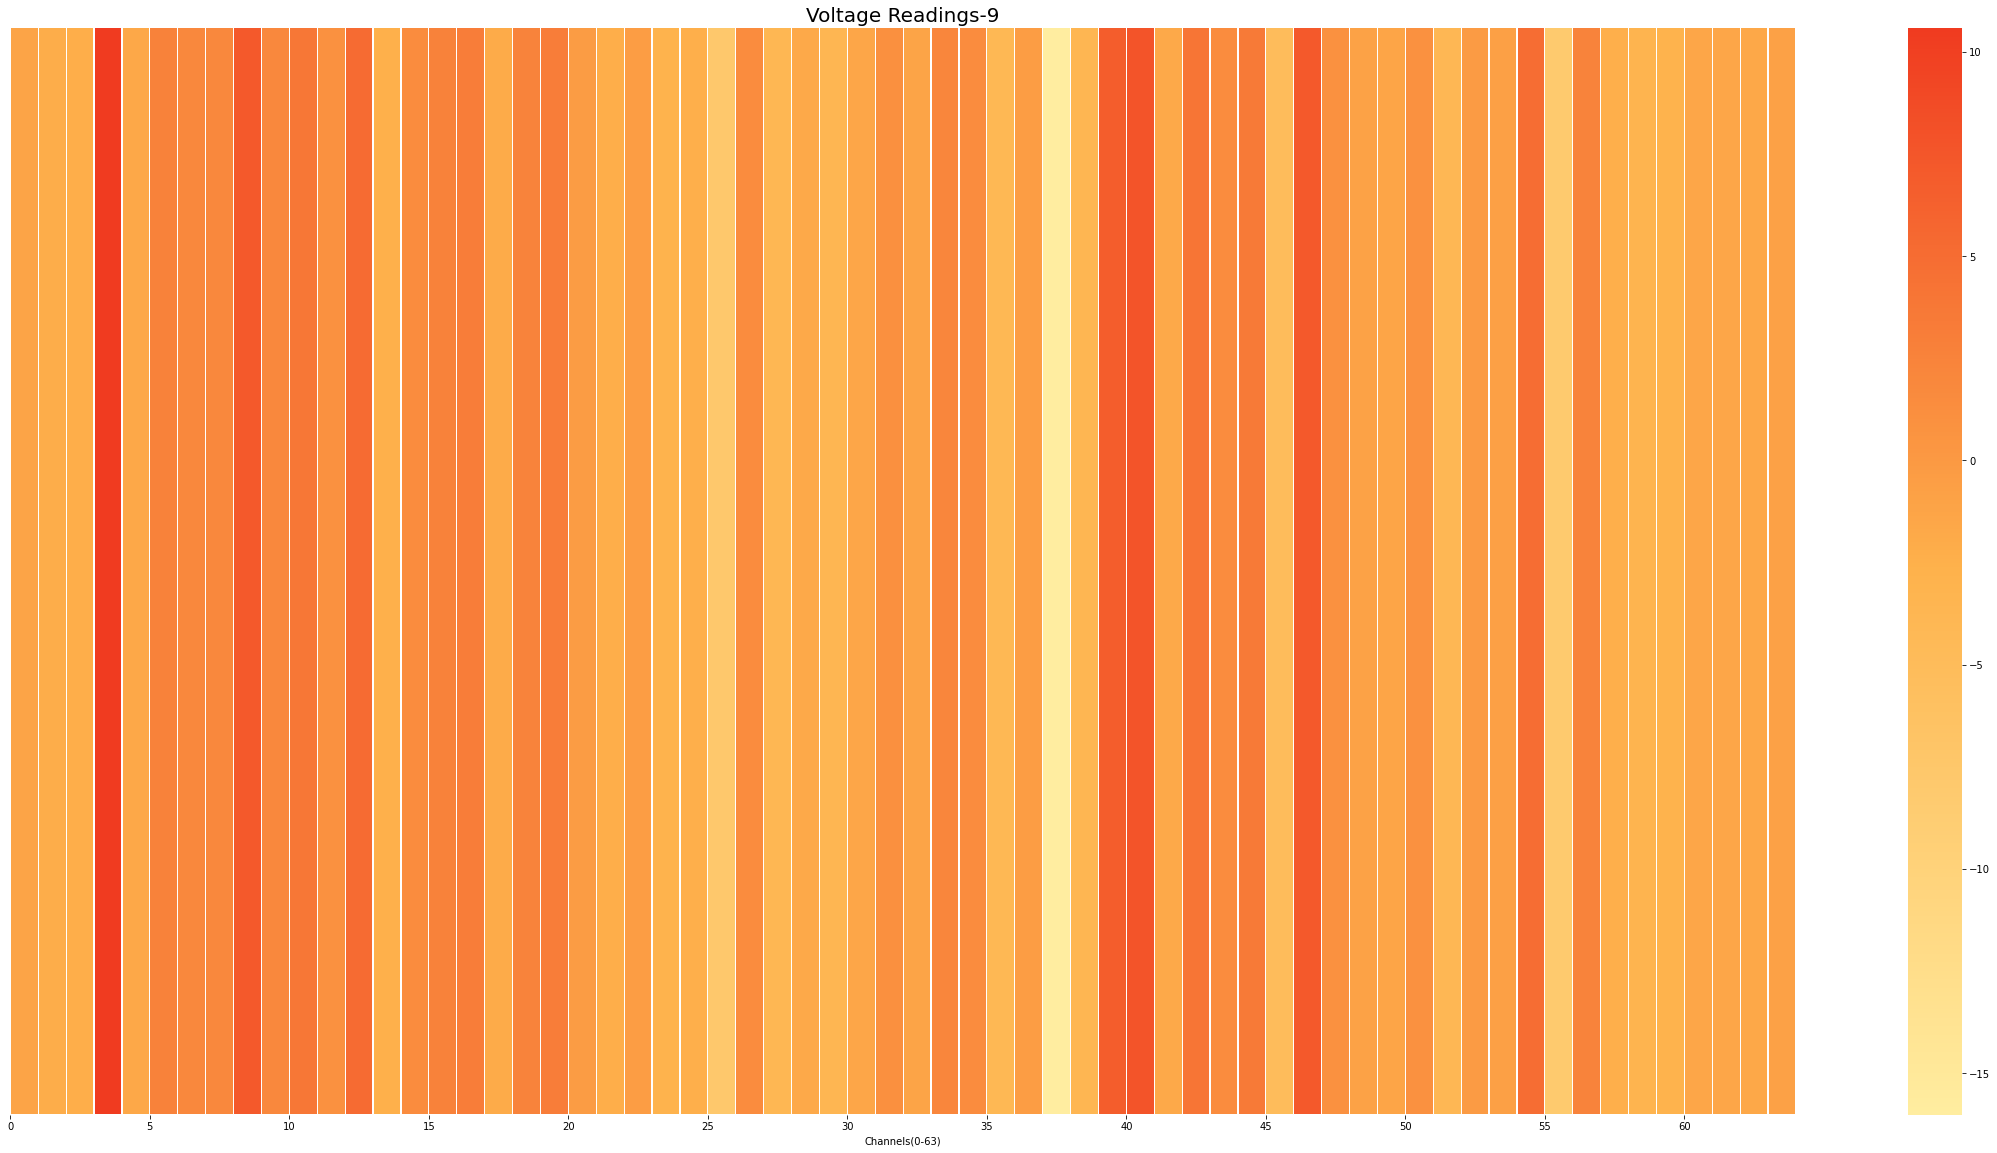

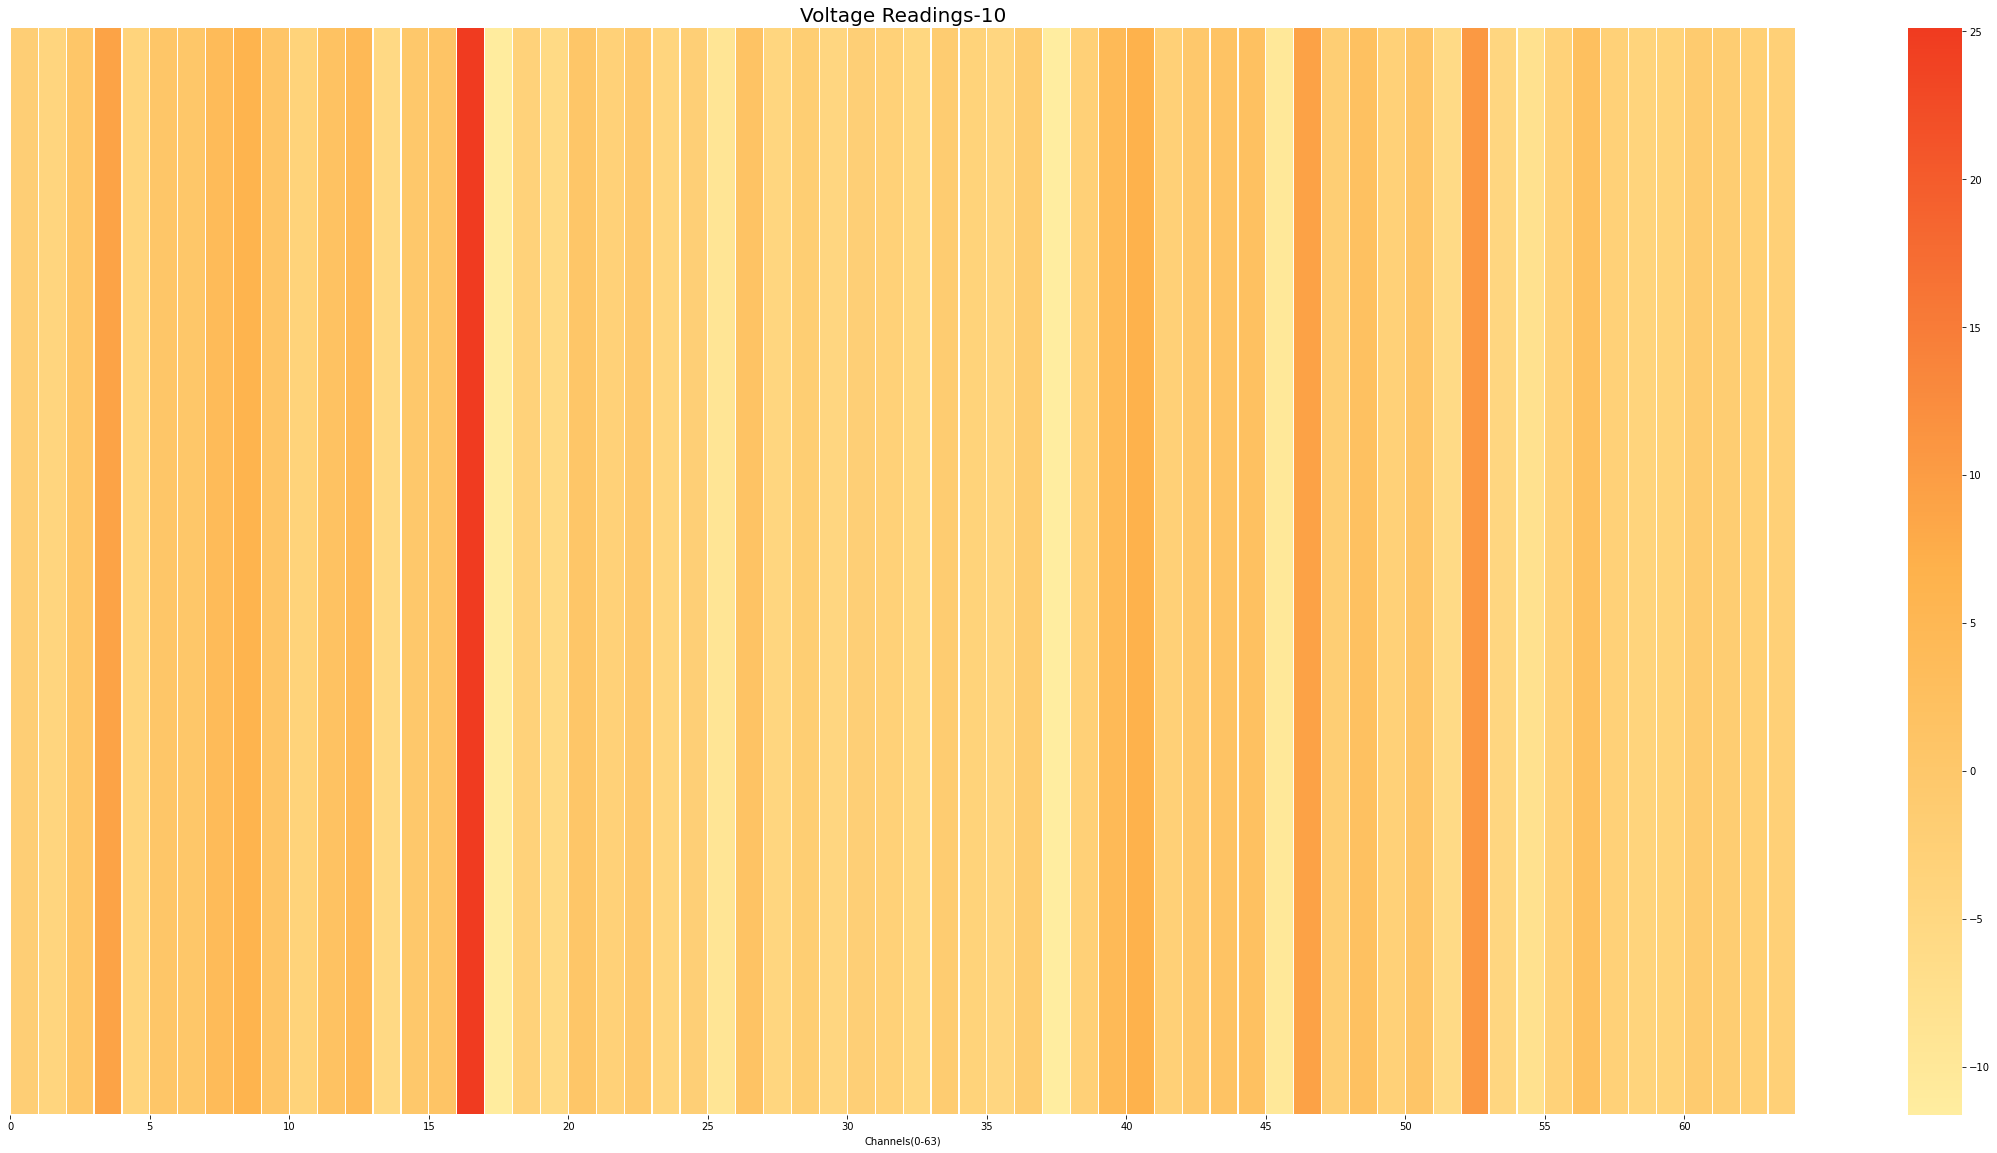

In [53]:
cmap = mcolors.LinearSegmentedColormap.from_list("n",['#ffeda0','#feb24c','#f03b20'])

#Xticks Column
x=[0,5,10,15,20,25,30,35,40,45,50,55,60]

#Running a loop across the time series
for i in range(1,256):
    X=F[F['sample num']==i]

#Plotting a heatmap

    D= X.pivot_table(values='sensor value', 
                                     index='subject identifier', 
                                     columns='channel')
    s, ax = plt.subplots(figsize=(40, 20))

   
    ax=sns.heatmap(D,fmt="g", cmap=cmap,linewidths=0.20)


    #Editing the Axes
    plt.title('Voltage Readings-'+str(i),fontname='Times New Roman',fontsize=20)
    plt.xlabel('Channels(0-63)',fontname='Times New Roman' ,fontsize=10)
    plt.ylabel('')
    plt.xticks(x,(0,5,10,15,20,25,30,35,40,45,50,55,60))
    plt.yticks([])
    
    #Saving all the heatmaps
    #plt.savefig("GG\Heatmap"+ str(i)+".png")
    
    #Showing few heatmaps to see the differences according to time series
    if i<11:
        continue
    #Closing so as to save memory
    plt.close(s)

([<matplotlib.axis.YTick at 0x7f9b95e5fc90>,
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '5'),
  Text(0, 2.5, '10'),
  Text(0, 3.5, '15'),
  Text(0, 4.5, '20'),
  Text(0, 5.5, '25'),
  Text(0, 6.5, '30'),
  Text(0, 7.5, '35'),
  Text(0, 8.5, '40'),
  Text(0, 9.5, '45'),
  Text(0, 10.5, '50'),
  Text(0, 11.5, '55'),
  Text(0, 12.5, '60')])

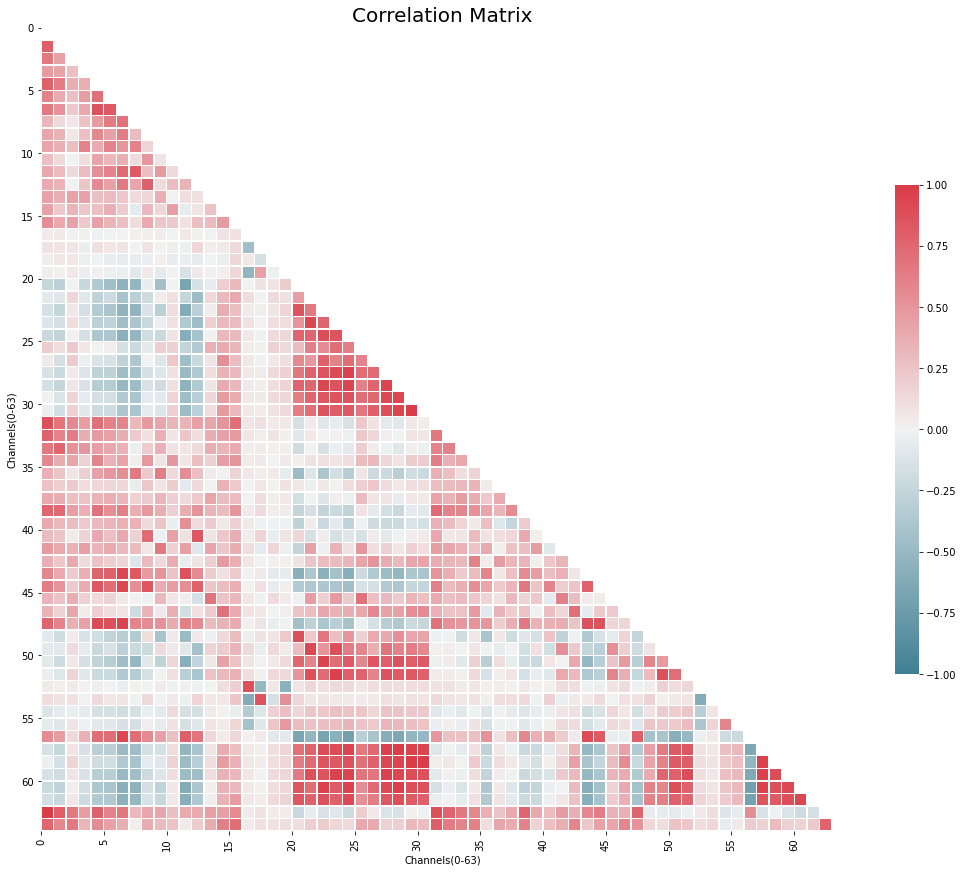

In [54]:
#Equating Co-Relations across all channels
for s in range(0,64):
    for j in range(0,64):
        X=F[F['channel']==s]
        Y=F[F['channel']==j]
        co=np.corrcoef(X['sensor value'],Y['sensor value'])[0,1]
        if s==0 and j==0:
            Z= pd.DataFrame(
            { 'corrcoef':co ,'channel 1': s , 'channel 2': j}, index=[s*64 +j])
        else: 
            Z = Z.append( pd.DataFrame(
            { 'corrcoef':co ,'channel 1': s , 'channel 2': j},index=[s*64 + j]))

D= Z.pivot_table(values='corrcoef', 
                                     index='channel 1', 
                                     columns='channel 2')

# Generating masks to avoid repition(As the matrix formed will be a symmetric one)
mask = np.zeros_like(D, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Generate the heatmap
sns.heatmap(D, mask=mask, cmap=cmap,  center=0,vmax=1,vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Edit the Axes and title
plt.title('Correlation Matrix',fontname='Times New Roman',fontsize=20)
plt.xlabel('Channels(0-63)',fontname='Times New Roman' ,fontsize=10)
plt.ylabel('Channels(0-63)', fontname='Times New Roman' ,fontsize=10)
x=[0,5,10,15,20,25,30,35,40,45,50,55,60]
plt.xticks(x,(0,5,10,15,20,25,30,35,40,45,50,55,60))
plt.yticks(x,(0,5,10,15,20,25,30,35,40,45,50,55,60))